# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=0.65)
import math
from IPython.display import HTML, display

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 58.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 64.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 36.7MB/s]


In [343]:
data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')

In [312]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [313]:
data_train.shape, data_test.shape

((5282, 20), (1761, 19))

In [314]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [315]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

### Изучение пропусков

In [316]:
is_nan = data_train.isna().sum() / len(data_train) * 100
print('Число nan в train dataset')
print(is_nan.sort_values(ascending=True))

Число nan в train dataset
ClientPeriod                0.0
IsBillingPaperless          0.0
HasContractPhone            0.0
HasMovieSubscription        0.0
HasOnlineTV                 0.0
HasTechSupportAccess        0.0
HasDeviceProtection         0.0
HasOnlineBackup             0.0
HasOnlineSecurityService    0.0
HasInternetService          0.0
HasMultiplePhoneNumbers     0.0
HasPhoneService             0.0
HasChild                    0.0
HasPartner                  0.0
IsSeniorCitizen             0.0
Sex                         0.0
TotalSpent                  0.0
MonthlySpending             0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64


In [335]:
display(data_train.query("TotalSpent == ' ' "),
        data_test.query("TotalSpent == ' ' ")
        )

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [336]:
print(f"Пропорция пропущенных данных в TotalSpent:\n \
 train: \
 {round(len(data_train[data_train['TotalSpent'] == ' ']) / len(data_train) * 100, 2)}%\
 \ttest: \
 {round(len(data_test[data_test['TotalSpent'] == ' ']) / len(data_test) * 100, 2) }%")

Пропорция пропущенных данных в TotalSpent:
  train:  0.17% 	test:  0.11%


In [344]:
data_train['TotalSpent'] = data_train['TotalSpent'].apply(lambda x : np.nan if x == ' ' else x)
data_train['TotalSpent'] = data_train['TotalSpent'].fillna(data_train['MonthlySpending']).astype(float)

data_test['TotalSpent'] = data_test['TotalSpent'].apply(lambda x : np.nan if x == ' ' else x)
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(data_test['MonthlySpending']).astype(float)

In [345]:
print(f"Дубликаты:\
  train: {data_train.duplicated().sum()},\
  {round(data_train.duplicated().sum() / len(data_train) * 100, 2) }%\t\
  test: {data_test.duplicated().sum()},\
  {round(data_train.duplicated().sum() / len(data_train) * 100, 2)}%"
  )

Дубликаты:  train: 14,  0.27%	  test: 3,  0.27%


In [346]:
data_train.drop_duplicates(inplace=True)

### Изучение уникальных признаков

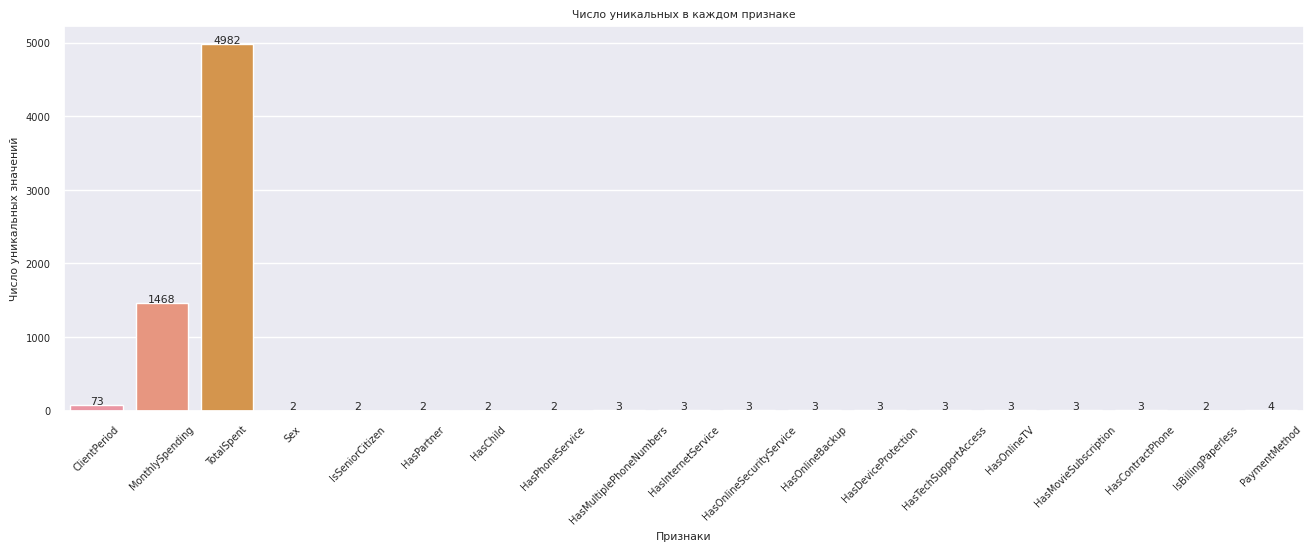

In [347]:
plt.figure(figsize=(16, 5))
uniques = [len(data_train[col].unique()) for col in feature_cols]

ax = sns.barplot(x = feature_cols, y = uniques);
ax.set(xlabel='Признаки', ylabel='Число уникальных значений', title='Число уникальных в каждом признаке');

for p, uniq in zip(ax.patches, uniques):
  ax.text(p.get_x() + p.get_width() / 2.,
          uniq + 10,
          uniq,
          ha='center');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Изучение целевой переменной

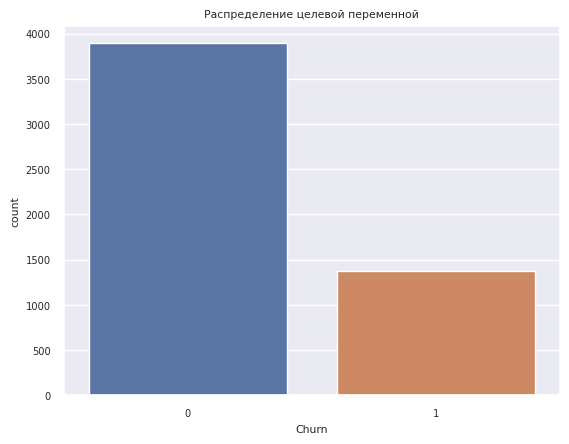

In [341]:
s = sns.countplot(x=data_train[target_col]);
s.set_title('Распределение целевой переменной');

Классы несбалансированны, но будем использовать логистическую регрессию с roc-auc, так что ок

### Изучение признаков

Распределения числовых признаков

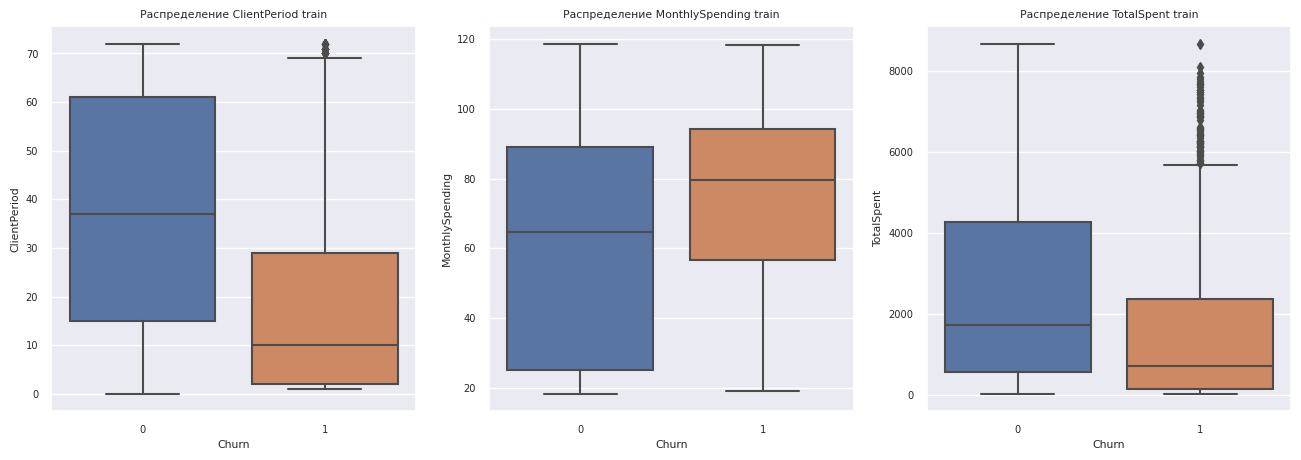

In [348]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
for i, col in enumerate(num_cols):
  sns.boxplot(y=col, x=target_col, data=data_train, ax=ax[i])
  ax[i].set_title('Распределение ' + col + ' train')

Распределения категориальных признаков

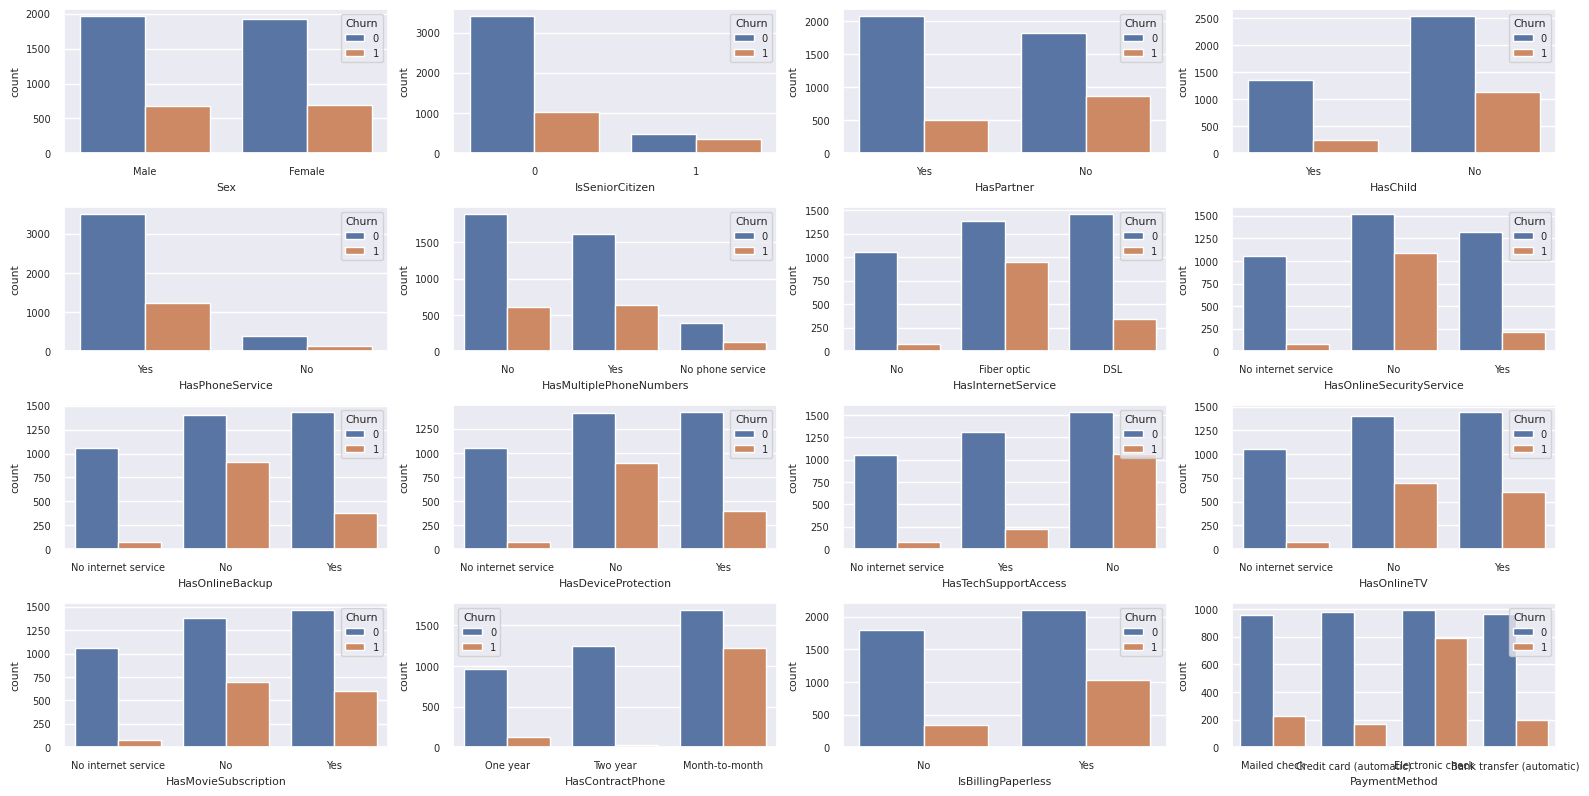

In [349]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(cat_cols):
  ax = plt.subplot(4, 4, i + 1)
  sns.countplot(x=col, hue=target_col, data=data_train)
plt.tight_layout()
plt.show()

Скорректируем несколько бинарных признаков

Классы несбалансированы ЧТОТОНАПИСАТЬ

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [350]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [351]:
train = data_train.copy()
X_train = train.drop(columns=target_col)
y_train = train[target_col]
X_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [352]:
transformer = ColumnTransformer([
                                ('categorical', OneHotEncoder(), cat_cols),
                                ('numerical', StandardScaler(), num_cols)
                    ], remainder='passthrough')

steps = [('transformer', transformer),
         ('model', LogisticRegression())]
pipeline = Pipeline(steps)
parameters = {'model__C' : np.logspace(-2, 3),
              'model__solver' : ['sag' , 'lbfgs']}
cv = GridSearchCV(
    pipeline,
    parameters,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=40)

In [353]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',...
       7.19685673e+00, 9.10298178e+00, 1.15139540e+01, 1.45634848e+01,
       1.84206997e+01, 2.32995181e+01, 2.94705170e+01, 3.72759372e+01,
       4.71486636e+01, 5.96362332e+01, 7.54312006e+01, 9.54095476e+01,
       1.20679264e+02, 1.52641797e+02, 1.93069773e+02, 2.44205309e+02,
       3.08884360e+02, 3.90693994e+02, 4.94171336e+02, 6.25055193e+02,
       7.90604321e+02, 1.00000000e+03]),
                         'model__solver': ['sag', 'lbfgs']},
             scoring='roc_auc', verbose=40)

In [354]:
print(f'Score: {cv.best_score_}\nПараметры:  {cv.best_params_}')

Score: 0.8445916435253513
Параметры:  {'model__C': 23.29951810515372, 'model__solver': 'lbfgs'}


In [365]:
X_test = data_test.copy()
preds = cv.best_estimator_.predict_proba(X_test)

sub = pd.read_csv('./submission.csv')
sub[target_col] = preds[:, 1]
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DLS MIPT/[3] Composition_of_algorithms/linear_regression.csv')

Качество 0.8459239569531074

с параметрами model__C': 23.29951810515372, 'model__solver': 'lbfgs'

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [206]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [356]:
from catboost import CatBoostClassifier, Pool

In [359]:
df_train, df_val = train_test_split(
    data_train,
    train_size=0.7,
    stratify=data_train[target_col])

X_train, y_train = df_train.drop(columns=target_col), df_train[target_col]
X_val, y_val = df_val.drop(columns=target_col), df_val[target_col]

pool_train = Pool(X_train, y_train,
                  cat_features = cat_cols)
pool_val = Pool(X_val, y_val,
                cat_features = cat_cols)

In [364]:
model = CatBoostClassifier(eval_metric='AUC', early_stopping_rounds = 20)
model.fit(pool_train, eval_set=pool_val)

Learning rate set to 0.04374
0:	test: 0.8143090	best: 0.8143090 (0)	total: 9.31ms	remaining: 9.3s
1:	test: 0.8284381	best: 0.8284381 (1)	total: 16.4ms	remaining: 8.18s
2:	test: 0.8394985	best: 0.8394985 (2)	total: 25.4ms	remaining: 8.43s
3:	test: 0.8415634	best: 0.8415634 (3)	total: 33.2ms	remaining: 8.26s
4:	test: 0.8418312	best: 0.8418312 (4)	total: 40.8ms	remaining: 8.11s
5:	test: 0.8417845	best: 0.8418312 (4)	total: 47.7ms	remaining: 7.9s
6:	test: 0.8415551	best: 0.8418312 (4)	total: 55.6ms	remaining: 7.89s
7:	test: 0.8415240	best: 0.8418312 (4)	total: 63.9ms	remaining: 7.93s
8:	test: 0.8418271	best: 0.8418312 (4)	total: 71.3ms	remaining: 7.85s
9:	test: 0.8414970	best: 0.8418312 (4)	total: 80ms	remaining: 7.92s
10:	test: 0.8416236	best: 0.8418312 (4)	total: 89.3ms	remaining: 8.03s
11:	test: 0.8411585	best: 0.8418312 (4)	total: 94ms	remaining: 7.74s
12:	test: 0.8408907	best: 0.8418312 (4)	total: 99.5ms	remaining: 7.56s
13:	test: 0.8414897	best: 0.8418312 (4)	total: 108ms	remaining: 

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [371]:
preds = model.predict_proba(X_test)

sub = pd.read_csv('./submission.csv')
sub[target_col] = preds[:, 1]
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/DLS MIPT/[3] Composition_of_algorithms/catboost.csv')